<a href="https://colab.research.google.com/github/kimtaeil12/c/blob/main/%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 필요한 라이브러리를 불러옵니다
import cv2
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds
import tensorflow as tf

In [5]:
# 필요한 데이터셋을 불러옵니다
data_train, ds_info = tfds.load('cats_vs_dogs',split=[tfds.Split.TRAIN], with_info = True)
ds_info

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.0',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir='/root/tensorflow_datasets/cats_vs_dogs/4.0.0',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=689.64 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=8>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul,

In [6]:
# 불러온 이미지 데이터를 확인합니다
images = [one['image'].numpy() for one in data_train[0].take(30)]
len(images)

30

(-0.5, 499.5, 374.5, -0.5)

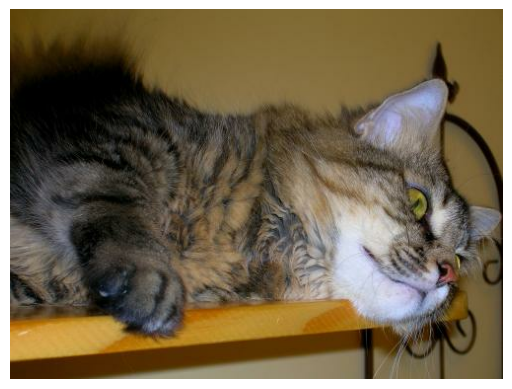

In [14]:
plt.imshow(images[3])
plt.axis('off')

In [10]:
# 케라스는 빠른 딥러닝 실험을 목적으로 설계되었으며, 아이디어를 결과물로 최대한 빠르게 구현하는 것
resnet50_pre = tf.keras.applications.resnet.ResNet50(weights='imagenet',input_shape=(224, 224, 3))
resnet50_pre.summary()

102967424/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                    

In [15]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions

In [16]:
def pred_img(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    img_resized = cv2.resize(img, (224,224))
    pred = resnet50_pre.predict(img_resized.reshape([1,224,224,3]))
    decoded_pred = decode_predictions(pred)

    for i, instance in enumerate(decoded_pred[0]):
      print('{}위:{}({:.2f}%)'.format(i+1, instance[1],instance[2]*100))

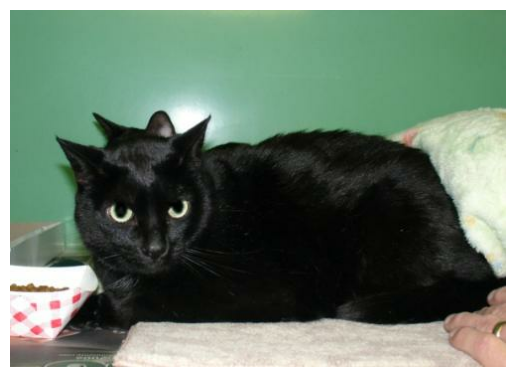

35363/35363 [==============================] - 0s 0us/step
1위:Egyptian_cat(13.10%)
2위:paper_towel(11.39%)
3위:tub(10.80%)
4위:tiger_cat(6.82%)
5위:shower_curtain(3.04%)


In [18]:
pred_img(images[11])